170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 10)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 10)


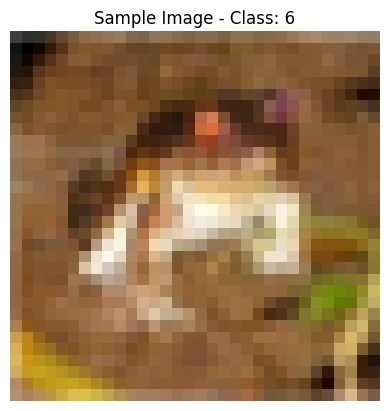

In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode labels
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Verify the data
print(f"Training data shape: {train_images.shape}, Training labels shape: {train_labels.shape}")
print(f"Test data shape: {test_images.shape}, Test labels shape: {test_labels.shape}")

# Visualize a sample image
plt.imshow(train_images[0])
plt.title("Sample Image - Class: " + str(tf.argmax(train_labels[0]).numpy()))
plt.axis('off')
plt.show()


In [2]:
from tensorflow.keras import layers, models

# Define the CNN architecture
def create_cnn_model():
    model = models.Sequential()

    # Convolutional Layer 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
    # Pooling Layer 1
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Convolutional Layer 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    # Pooling Layer 2
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Convolutional Layer 3
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    # Pooling Layer 3
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    # Flatten Layer
    model.add(layers.Flatten())

    # Fully Connected Layer 1
    model.add(layers.Dense(128, activation='relu'))

    # Dropout Layer
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Instantiate the model
cnn_model = create_cnn_model()

# Display the model summary
cnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


In [4]:
# Define training parameters
epochs = 25
batch_size = 64

# Train the model
history = cnn_model.fit(train_images, train_labels,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=1)


Epoch 1/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 88s 138ms/step - accuracy: 0.2793 - loss: 1.9320 - val_accuracy: 0.5347 - val_loss: 1.3046
Epoch 2/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 135ms/step - accuracy: 0.4968 - loss: 1.3837 - val_accuracy: 0.6035 - val_loss: 1.1226
Epoch 3/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.5742 - loss: 1.1959 - val_accuracy: 0.6443 - val_loss: 1.0176
Epoch 4/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.6261 - loss: 1.0622 - val_accuracy: 0.6835 - val_loss: 0.9003
Epoch 5/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.6637 - loss: 0.9496 - val_accuracy: 0.7000 - val_loss: 0.8608
Epoch 6/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.6892 - loss: 0.8885 - val_accuracy: 0.7124 - val_loss: 0.8208
Epoch 7/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 143s 133ms/step - accuracy: 0.7109 - loss: 0.8322 - val_accuracy: 0.7161 - val_loss: 0.8167
Epoch 8/25
625/625 ━━━━━━━━━━━━━━━━━━━━ 141s 133ms/step - accuracy: 0.7305 - loss

In [5]:
# Evaluate the model on test data
test_loss, test_accuracy = cnn_model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 7s - 23ms/step - accuracy: 0.7416 - loss: 1.0415
Test Accuracy: 74.16%
Test Loss: 1.0415


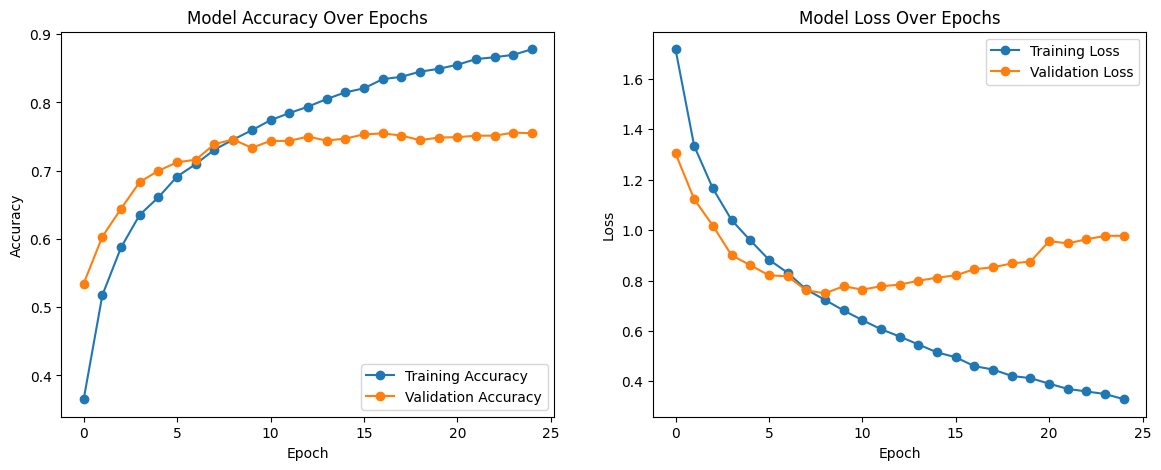

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [7]:
# Save the model to disk
model_save_path = 'cnn_cifar10_model.h5'
cnn_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Load the model from disk
loaded_model = tf.keras.models.load_model(model_save_path)
print("Model loaded successfully.")

# Verify loaded model performance
loaded_test_loss, loaded_test_accuracy = loaded_model.evaluate(test_images, test_labels, verbose=2)
print(f"Loaded Model Test Accuracy: {loaded_test_accuracy * 100:.2f}%")


Model saved to cnn_cifar10_model.h5
Model loaded successfully.
313/313 - 7s - 22ms/step - accuracy: 0.7416 - loss: 1.0415
Loaded Model Test Accuracy: 74.16%
